In [6]:
import numpy as np

# Prueba 1

## Problema y solución

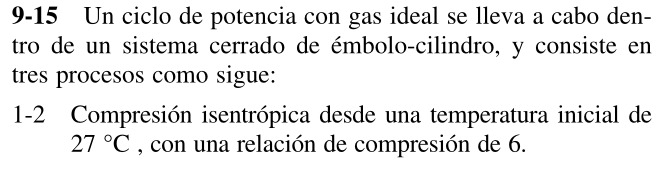

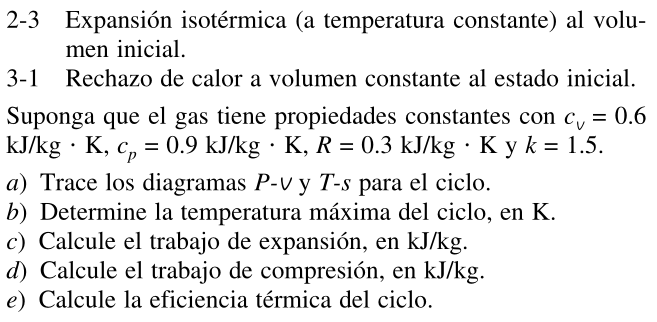

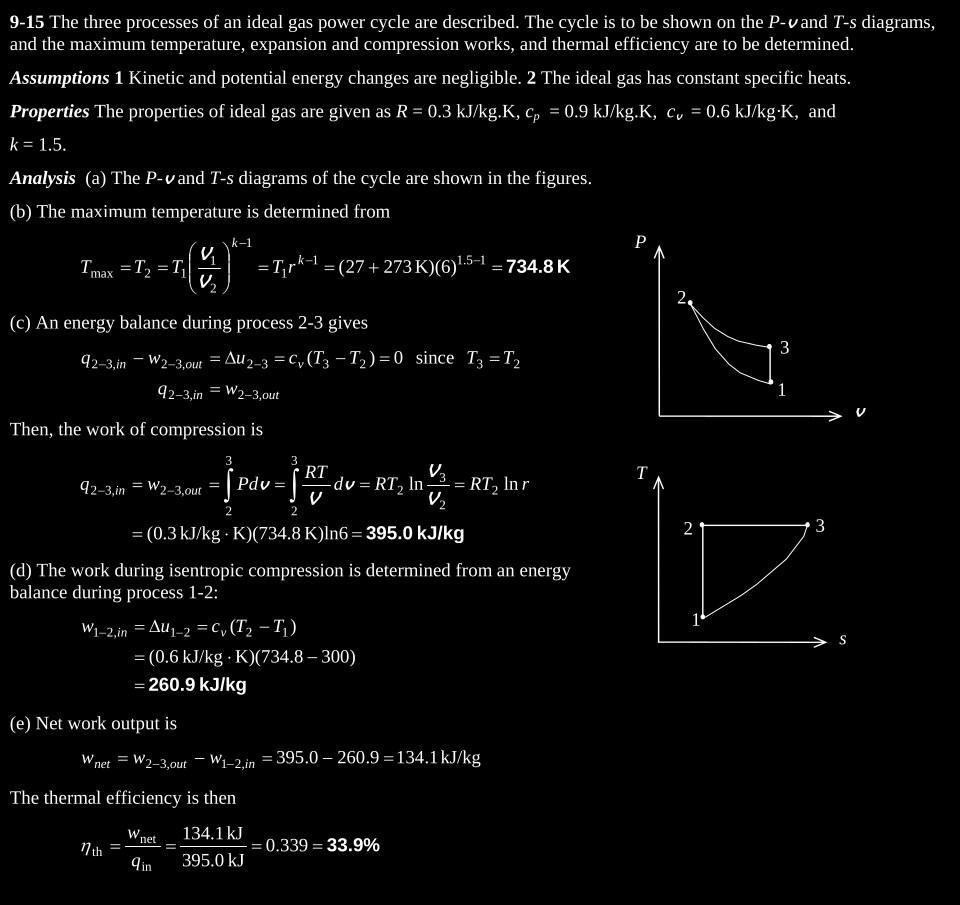

## Solución vía calculadora Termodinámica

In [7]:
from modelos import ModeloGasIdeal
from ciclo_estados import CicloTermodinamico

modelo1 = ModeloGasIdeal(R_gas=0.3*1000,cp=0.9*1000,cv=0.6*1000)
ciclo1 = CicloTermodinamico(modelo1,n_estados = 3, n_values = 100)

ciclo1.agregar_estado(1, T=27+273.15, v=6)
ciclo1.agregar_estado(2, v=1)
ciclo1.agregar_estado(3, v=6)


ciclo1.proceso_isoentropico(ciclo1.estados[0],ciclo1.estados[1])
ciclo1.proceso_isotermico(ciclo1.estados[1],ciclo1.estados[2])
ciclo1.proceso_isocorico(ciclo1.estados[2], ciclo1.estados[0])

ciclo1.mostrar_ciclo()

#ciclo1.graficar_diagrama_Ts()
#ciclo1.graficar_diagrama_Pv()
ciclo1.generar_dataframes(opcion=2)[1]

Los volúmenes de los estados 3 y 1 fueron definidos y son iguales.
1: P=15007.50 Pa, T=300.15 K, v=6.00 m³/kg, u=180090.00 J/kg, h=270135.00 J/kg, s=578.95 J/kg·K
2: P=220564.30 Pa, T=735.21 K, v=1.00 m³/kg, u=441128.61 J/kg, h=661692.91 J/kg, s=578.95 J/kg·K
3: P=36760.72 Pa, T=735.21 K, v=6.00 m³/kg, u=441128.61 J/kg, h=661692.91 J/kg, s=1116.48 J/kg·K


,nombre,P [Pa],T [K],v [m³/kg],u [J/kg],h [J/kg],s [J/kg·K]
0,1,15007.500000,300.150000,6.000000,180090.000000,270135.000000,578.952000
1,1.1,15195.170596,301.395958,5.950495,180837.574820,271256.362230,578.952000
2,1.2,15386.785469,302.657562,5.900990,181594.537421,272391.806131,578.952000
3,1.3,15582.461658,303.935143,5.851485,182361.085942,273541.628913,578.952000
4,1.4,15782.320706,305.229041,5.801980,183137.424428,274706.136643,578.952000
...,...,...,...,...,...,...,...
298,3.96,16084.391946,321.687839,6.000000,193012.703355,289519.055033,620.531568
299,3.97,15869.013557,317.380271,6.000000,190428.162684,285642.244026,612.442979
300,3.98,15653.635168,313.072703,6.000000,187843.622013,281765.433020,604.243855
301,3.99,15438.256779,308.765136,6.000000,185259.081342,277888.622013,595.931135


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Diagrama P-v: Ciclo termodinámico'}, xlabel='Volumen específico [$m^3$/kg]', ylabel='Presión [Pa]'>)

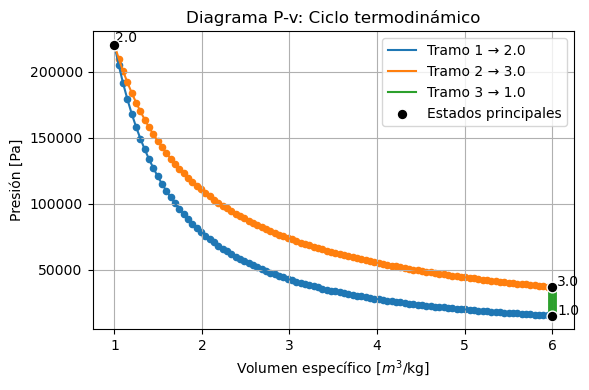

In [8]:
ciclo1.graficar_diagrama_Pv()

# Prueba 2

## Problema y solución

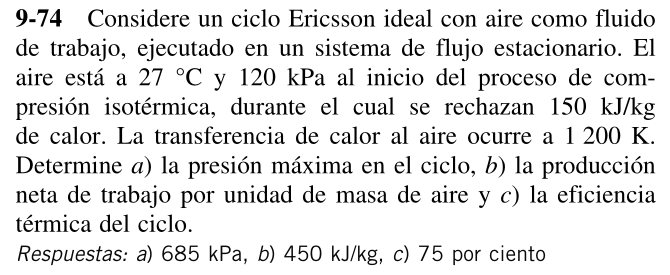

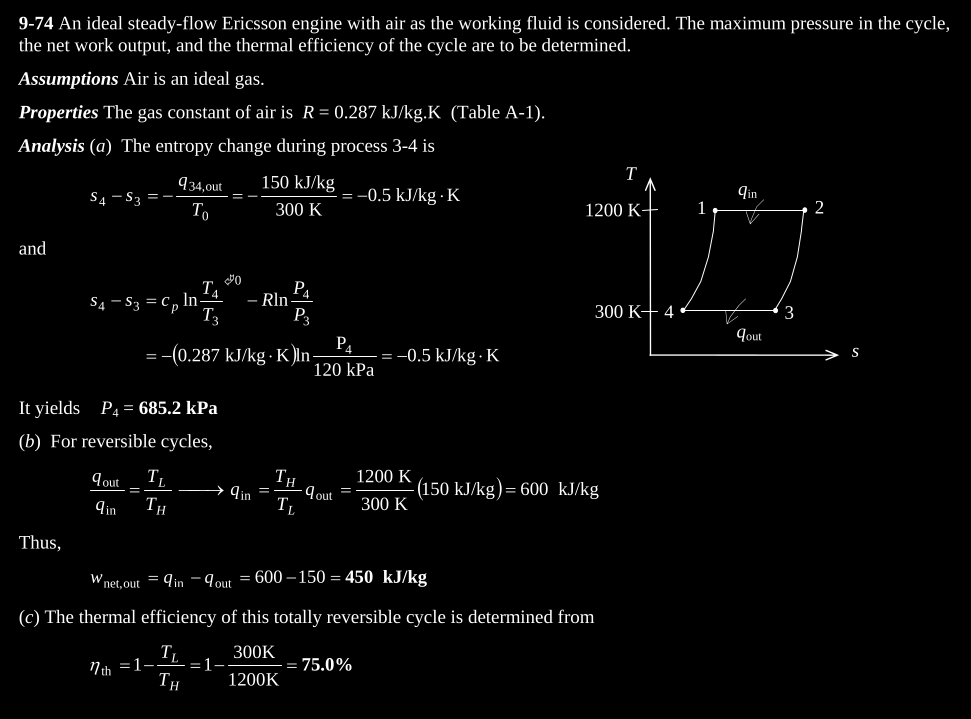

## Solución vía calculadora termodinámica

Combinación de propiedades no soportada o insuficiente.
Las temperaturas de los estados 1 y 2 fueron definidas y son iguales.
Las entropias de los estados 1 y 2 fueron definidos pero no son iguales. Son congruentes con el cambio esperado
1: P=684563.48 Pa, T=1200.00 K, v=0.50 m³/kg, u=720000.00 J/kg, h=1080000.00 J/kg, s=704.93 J/kg·K
2: P=120000.00 Pa, T=1200.00 K, v=2.87 m³/kg, u=720000.00 J/kg, h=1080000.00 J/kg, s=1204.68 J/kg·K
3: P=120000.00 Pa, T=300.15 K, v=0.72 m³/kg, u=180090.00 J/kg, h=270135.00 J/kg, s=-42.53 J/kg·K
4: P=684563.48 Pa, T=300.15 K, v=0.13 m³/kg, u=180090.00 J/kg, h=270135.00 J/kg, s=-542.28 J/kg·K


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Diagrama P-v: Ciclo termodinámico'}, xlabel='Volumen específico [$m^3$/kg]', ylabel='Presión [Pa]'>)

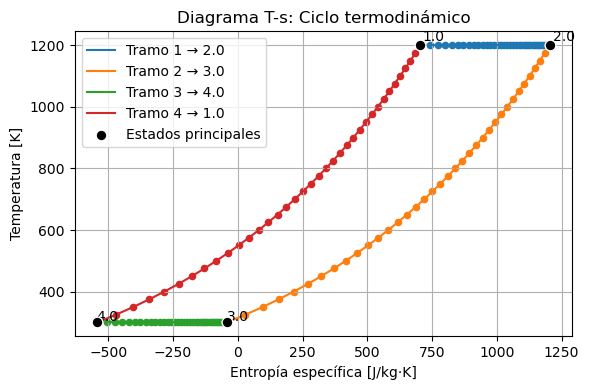

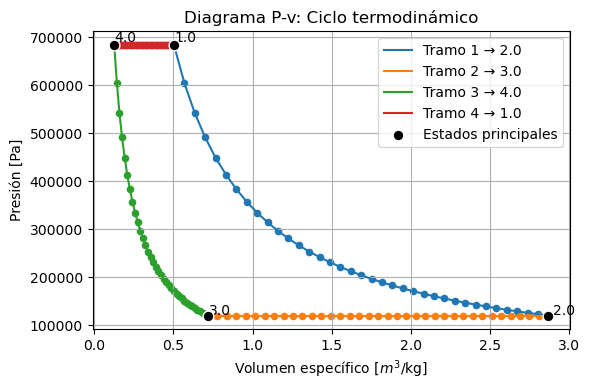

In [9]:
modelo2 = ModeloGasIdeal(R_gas=0.287*1000,cp=0.9*1000,cv=0.6*1000)
ciclo2 = CicloTermodinamico(modelo2,n_estados = 4)

# El orden de definicion de los estados no importa siempre que se tenga coherencia al unirlo mediante ciclos
# No obstante se recomiendo hacer que el primer estado del ciclo sea el que esta totalmente definido
ciclo2.agregar_estado(1, T = 1200)
ciclo2.agregar_estado(2, T = 1200)
ciclo2.agregar_estado(3, T=300.15, P = 120*1000)
ciclo2.agregar_estado(4)

# Definir el proceso de trasferencia de calor entre los estados 3 y 4, nos dota de la informacion necesaria para definir los estados 1 y 2 mediante sus procesos.
calor_out = -150*1000
ciclo2.proceso_in_or_out_calor(ciclo2.estados[2], ciclo2.estados[3], calor_out)


# Proceso isobarico entre el estado 2 y el 3
ciclo2.proceso_isobarico(ciclo2.estados[1], ciclo2.estados[2])

# Proceso isobarico entre el estado 4 y  el 1
ciclo2.proceso_isobarico(ciclo2.estados[3], ciclo2.estados[0])

# A pesar de que el ciclo ya tiene todos los estados definidos, es necesario cerrarlo con el proceso que hay entre los estados 1 y 2

ciclo2.proceso_in_or_out_calor(ciclo2.estados[0],ciclo2.estados[1], -calor_out*ciclo2.estados[0].T/ciclo2.estados[2].T)


ciclo2.mostrar_ciclo()
ciclo2.graficar_diagrama_Ts()
ciclo2.graficar_diagrama_Pv()

# Prueba 3

## Problema y solución

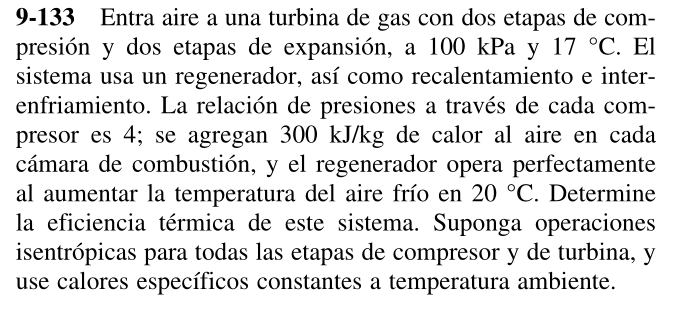
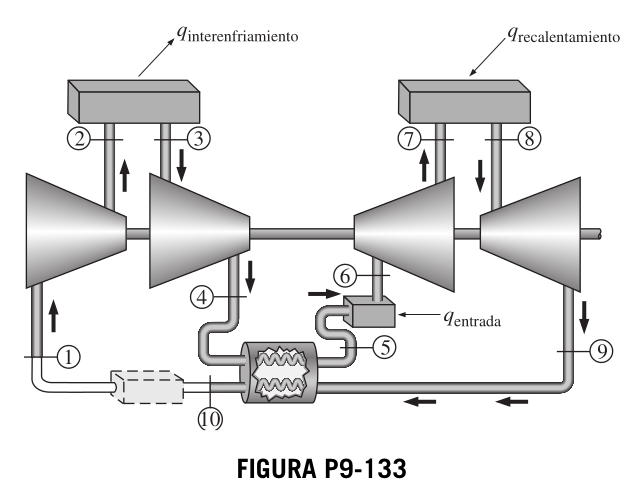

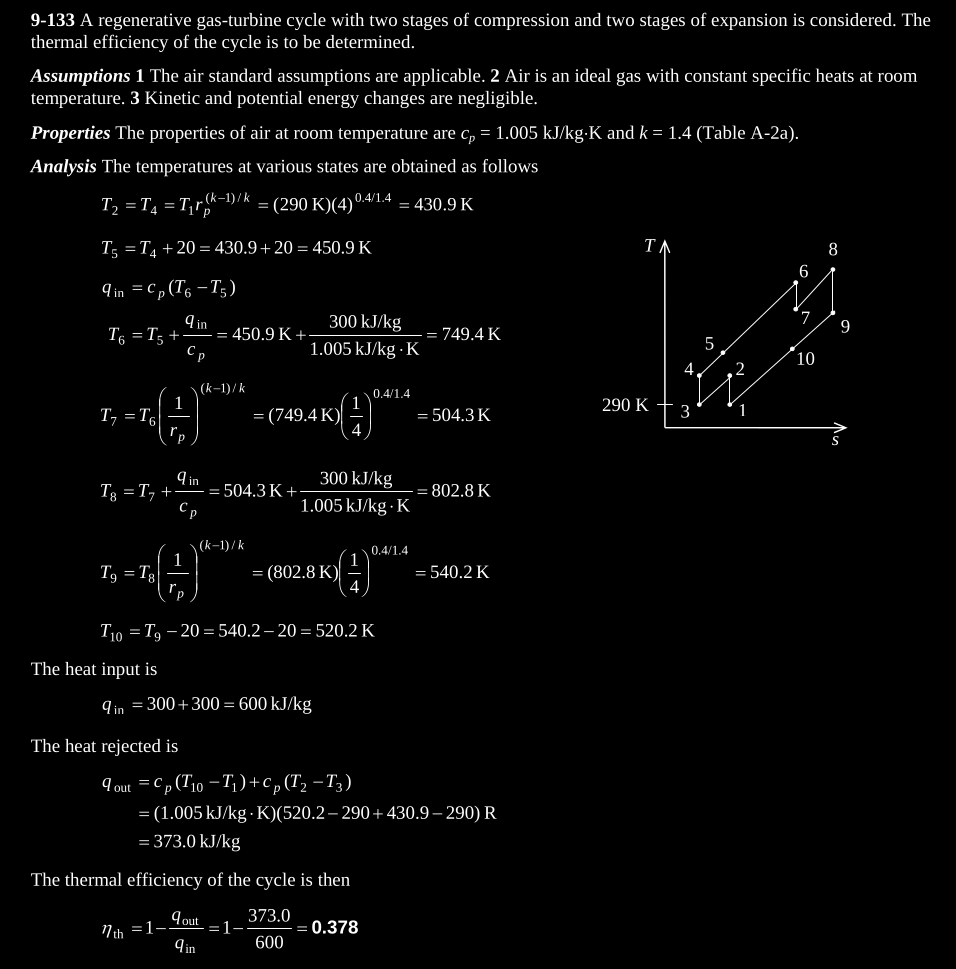

## Solución vía calculadora termodinámica

Las presiones de los estados 5 y 6 fueron definidas y son iguales.
Las presiones de los estados 7 y 8 fueron definidas y son iguales.
Las presiones de los estados 10 y 1 fueron definidas y son iguales.
1: P=100000.00 Pa, T=290.15 K, v=0.83 m³/kg, u=208286.25 J/kg, h=291600.75 J/kg, s=-23.56 J/kg·K
2: P=400000.00 Pa, T=431.08 K, v=0.31 m³/kg, u=309451.19 J/kg, h=433231.67 J/kg, s=-23.56 J/kg·K
3: P=400000.00 Pa, T=290.15 K, v=0.21 m³/kg, u=208286.25 J/kg, h=291600.75 J/kg, s=-421.42 J/kg·K
4: P=1600000.00 Pa, T=431.08 K, v=0.08 m³/kg, u=309451.19 J/kg, h=433231.67 J/kg, s=-421.42 J/kg·K
5: P=1600000.00 Pa, T=451.08 K, v=0.08 m³/kg, u=323808.34 J/kg, h=453331.67 J/kg, s=-375.85 J/kg·K
6: P=1600000.00 Pa, T=749.58 K, v=0.13 m³/kg, u=538094.05 J/kg, h=753331.67 J/kg, s=134.58 J/kg·K
7: P=400000.00 Pa, T=504.53 K, v=0.36 m³/kg, u=362181.81 J/kg, h=507054.53 J/kg, s=134.58 J/kg·K
8: P=400000.00 Pa, T=803.04 K, v=0.58 m³/kg, u=576467.52 J/kg, h=807054.53 J/kg, s=601.67 J/kg·K
9: P=100000.00 P

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Diagrama P-v: Ciclo termodinámico'}, xlabel='Volumen específico [$m^3$/kg]', ylabel='Presión [Pa]'>)

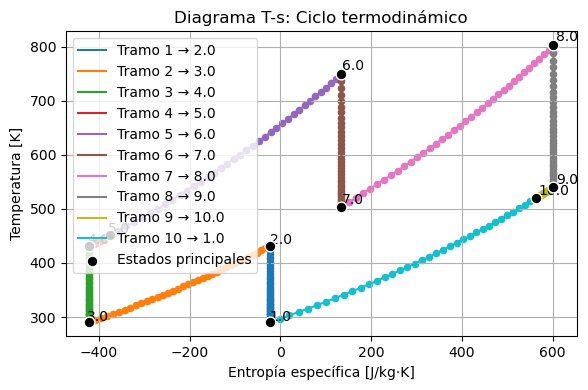

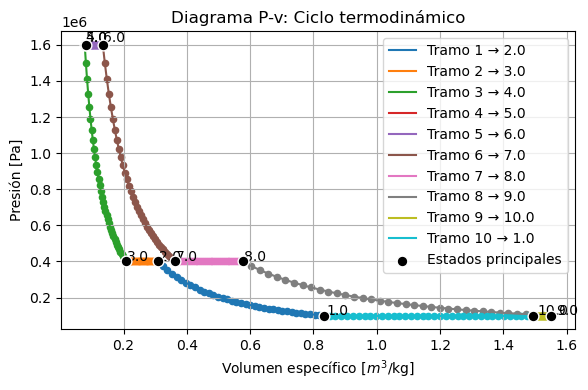

In [10]:
modelo3 = ModeloGasIdeal(R_gas=0.287*1000,cp=1.005*1000,cv=np.round(1.005*1000/1.4,6)) # Tener cuido con la definicion de los cp y cv, 
																						#puede causar grander errores si no se modifican segun se requiera
ciclo3 = CicloTermodinamico(modelo3,n_estados = 10)

calor_camara = 300*1000 # J/kg
intercambiador_T = 20 # K

ciclo3.agregar_estado(1, P= 100*1000, T = 17+273.15)
ciclo3.agregar_estado(2, P = 4*100*1000)
ciclo3.agregar_estado(3, T = ciclo3.estados[0].T)
ciclo3.agregar_estado(4, P = (4**2)*100*1000)
ciclo3.agregar_estado(5)
ciclo3.agregar_estado(6, P = 16*100*1000) 
ciclo3.agregar_estado(7, P = 4*100*1000)
ciclo3.agregar_estado(8,P = 4*100*1000)
ciclo3.agregar_estado(9, P = 1*100*1000)
ciclo3.agregar_estado(10)

ciclo3.proceso_isoentropico(ciclo3.estados[0], ciclo3.estados[1])
ciclo3.proceso_isobarico(ciclo3.estados[1],ciclo3.estados[2])
ciclo3.proceso_isoentropico(ciclo3.estados[2], ciclo3.estados[3])
ciclo3.estados[4].T = ciclo3.estados[3].T + intercambiador_T
ciclo3.proceso_isobarico(ciclo3.estados[3],ciclo3.estados[4] )
ciclo3.estados[5].T = ciclo3.estados[4].T + calor_camara/modelo3.cp
ciclo3.proceso_isobarico(ciclo3.estados[4], ciclo3.estados[5])
ciclo3.proceso_isoentropico(ciclo3.estados[5], ciclo3.estados[6])
ciclo3.estados[7].T = ciclo3.estados[6].T + calor_camara/modelo3.cp
ciclo3.proceso_isobarico(ciclo3.estados[6],ciclo3.estados[7])
ciclo3.proceso_isoentropico(ciclo3.estados[7],ciclo3.estados[8])
ciclo3.estados[9].T = ciclo3.estados[8].T - intercambiador_T
ciclo3.proceso_isobarico(ciclo3.estados[8],ciclo3.estados[9])
ciclo3.proceso_isobarico(ciclo3.estados[9],ciclo3.estados[0])

ciclo3.mostrar_ciclo()

ciclo3.graficar_diagrama_Ts()
ciclo3.graficar_diagrama_Pv()